<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Spam_classification_Embedded_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# START

In [2]:
import zipfile

x = zipfile.ZipFile('/content/main.zip','r')

x.extractall()
x.close()

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [4]:
data = pd.read_csv('/content/recurrent-neural-networks-2478142-main/Exercise Files/Spam-Classification.csv')

In [5]:
data

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
1495,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop."
1496,ham,Yup... From what i remb... I think should be c...
1497,ham,Yup... How Ã¼ noe leh...
1498,ham,Yup... Ok i go home look at the timings then i...


In [6]:
spam_messages= data['SMS']
spam_data = data['CLASS']

In [7]:
np.array(spam_messages)

array([" said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day! ",
       '&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.',
       '(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..',
       ..., 'Yup... How Ã¼ noe leh...',
       'Yup... Ok i go home look at the timings then i msg Ã¼ again... Xuhui going to learn on 2nd may too but her lesson is at 8am',
       '<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
spam_classes = le.fit_transform(spam_data)

In [9]:
spam_classes

array([0, 0, 1, ..., 0, 0, 1])

In [10]:
spam_classes = tf.keras.utils.to_categorical (spam_classes, 2)

In [11]:
spam_classes,len(spam_classes),spam_classes.shape

(array([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 1500,
 (1500, 2))

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
Vocab_Length = 10000
Max_Sequence_Length = 100

spam_tokenizer = Tokenizer(num_words=Vocab_Length)
spam_tokenizer.fit_on_texts(spam_messages)

In [14]:
len (spam_tokenizer.word_index)

4688

In [15]:
spam_tokenizer.word_index.get('said')

260

In [16]:
spam_sequence = spam_tokenizer.texts_to_sequences(spam_messages) # Converting sentence to dictonary
spam_padding = pad_sequences(spam_sequence,maxlen=Max_Sequence_Length) # creating unique shape for input

In [17]:
z = spam_sequence[10]

In [18]:
for x in z:
    print(spam_tokenizer.index_word.get(x))

forwarded
from
448712404000
please
call
08712404000
immediately
as
there
is
an
urgent
message
waiting
for
you


In [19]:
z

[693, 26, 2305, 69, 5, 2306, 628, 70, 96, 10, 116, 73, 111, 210, 9, 2]

In [20]:
spam_padding[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  693,   26, 2305,   69,
          5, 2306,  628,   70,   96,   10,  116,   73,  111,  210,    9,
          2], dtype=int32)

In [21]:
spam_tokenizer.index_word.get(0) # nothing for 0'th index

In [22]:
spam_padding.shape

(1500, 100)

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(spam_padding,spam_classes,test_size=.1)

In [24]:
!pip install kaggle

In [25]:
from google. colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"krishnaschavan","key":"6f1c6fc054fb8d6259f3b6411ea6191e"}'}

In [26]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d watts2/glove6b50dtxt

mkdir: cannot create directory ‘/root/.kaggle’: File exists
glove6b50dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
x = zipfile.ZipFile('/content/glove6b50dtxt.zip')
x.extractall()
x.close()

In [28]:
glove_dict = {}

with open('/content/glove.6B.50d.txt','r',encoding="utf8") as glove_file:
    for line in glove_file:
        emb_line = line.split()
        emb_token = emb_line[0]
        emb_vector = np.array(emb_line[1:],dtype=np.float32)

        if emb_vector.shape[0] == 50:
            glove_dict[emb_token] = emb_vector

In [29]:
len(glove_dict)

400000

In [ ]:
spam_tokenizer.word_index.items()

In [31]:
# creating embedding matrix
vocab_len = len(spam_tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_len,50))

In [32]:
np.zeros((50,50))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
len(glove_dict.get("is"))

50

In [34]:
for word, id in spam_tokenizer.word_index.items ():
    try:
        embedding_vector = glove_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[id] = embedding_vector
    except:
        pass


In [35]:
embedding_matrix.shape

(4689, 50)

In [36]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow. keras. regularizers import l2
from tensorflow.keras.layers import LSTM, Dense

In [37]:
CLASSES = 2

model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Embedding(
        vocab_len,
        50,
        weights=[embedding_matrix],
        input_length=Max_Sequence_Length,
        trainable=True
    )
)

model.add (LSTM (256) )
model. add(keras.layers.Flatten())

model.add(Dense(CLASSES,
                activation="softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           234450    
                                                                 
 lstm (LSTM)                 (None, 256)               314368    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 549,332
Trainable params: 549,332
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics= [ 'accuracy' ])

In [40]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=len(x_train),
    # batch_size = 256,
    epochs = 10,
    validation_data=(x_test,y_test),
    validation_steps=len(x_test)
)

Epoch 1/10
1350/1350 [==============================] - 31s 18ms/step - loss: 0.2165 - accuracy: 0.9274 - val_loss: 0.0470 - val_accuracy: 0.9933
Epoch 2/10
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0764 - accuracy: 0.9770 - val_loss: 0.0326 - val_accuracy: 0.9867
Epoch 3/10
1350/1350 [==============================] - 9s 7ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.0342 - val_accuracy: 0.9800
Epoch 4/10
1350/1350 [==============================] - 9s 7ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 5/10
1350/1350 [==============================] - 9s 7ms/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 0.0704 - val_accuracy: 0.9800
Epoch 6/10
1350/1350 [==============================] - 10s 8ms/step - loss: 4.6489e-04 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9733
Epoch 7/10
1350/1350 [==============================] - 15s 11ms/step - loss: 8.0581e-05 - accuracy: 1.0000 - val_loss: 0.0892 - 

<Axes: >

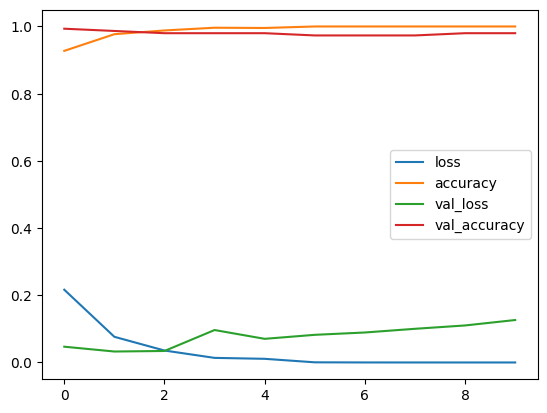

In [41]:
pd.DataFrame(history.history).plot()

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics= [ 'accuracy' ])

In [43]:
print(history.history)

{'loss': [0.2165401130914688, 0.07642592489719391, 0.03557306528091431, 0.01369129866361618, 0.010907886549830437, 0.0004648890462704003, 8.058117236942053e-05, 3.0025434170966037e-05, 9.846160537563264e-06, 4.001349680038402e-06], 'accuracy': [0.9274073839187622, 0.9770370125770569, 0.9881481528282166, 0.9962962865829468, 0.995555579662323, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.046957697719335556, 0.032626185566186905, 0.03422443941235542, 0.09655360132455826, 0.07037242501974106, 0.08230168372392654, 0.08924251794815063, 0.100233294069767, 0.11019939184188843, 0.1263502687215805], 'val_accuracy': [0.9933333396911621, 0.9866666793823242, 0.9800000190734863, 0.9800000190734863, 0.9800000190734863, 0.9733333587646484, 0.9733333587646484, 0.9733333587646484, 0.9800000190734863, 0.9800000190734863]}


In [48]:
input_str = ["You won 10000000 euro congralutation get it by today ",
                "tomorrow is holiday"]

input_seq = spam_tokenizer.texts_to_sequences(input_str)
input_padded = pad_sequences(input_seq, maxlen=Max_Sequence_Length)

pred = np.argmax(model.predict (input_padded), axis=1 )


1/1 [==============================] - 0s 29ms/step


In [49]:
print(le.inverse_transform(pred))

['spam' 'ham']
